In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# Set seed for reproducibility
SEED = 42
tf.random.set_seed(SEED)

# Function to load data
def load_data(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File '{file_path}' not found.")
    return pd.read_csv(file_path)

def preprocess_data(data):
    # Encode the target variable (Species) to numeric values
    label_encoder = LabelEncoder()
    data['Species'] = label_encoder.fit_transform(data['Species'])

    # Separate features and target
    X_data = data.iloc[:, 0:4].values  # Features
    Y_data = data.iloc[:, 4].values    # Target

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_data)

    # One-hot encode the target variable
    Y_one_hot = tf.keras.utils.to_categorical(Y_data, 3)

    # Return the scaler, label encoder, and processed data
    return X_scaled, Y_one_hot, scaler, label_encoder

# Function to split data into train and test sets
def split_data(X, Y, test_size=0.1):
    return train_test_split(X, Y, test_size=test_size, random_state=SEED)

# Main execution
def main():
    file_path = r"C:\Users\faris\OneDrive\Documents\Learning\Ex_Files_Deep_Learning_Getting_Started (1)\Ex_Files_Deep_Learning_Getting_Started\Exercise Files\iris.csv"
    
    # 1. Load data
    print("\nLoading Data...")
    iris_data = load_data(file_path)
    print("\nFirst 5 Rows of the Data:")
    print(iris_data.head())

    # 2. Preprocess data
    print("\nPreprocessing Data...")
    X, Y, scaler, label_encoder = preprocess_data(iris_data)

    # 3. Split data into train and test sets
    print("\nSplitting Data...")
    X_train, X_test, Y_train, Y_test = split_data(X, Y)

    print("\nTrain/Test Data Shapes:")
    print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
    print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")
    
    return X_train, X_test, Y_train, Y_test, scaler, label_encoder


if __name__ == "__main__":
    X_train, X_test, Y_train, Y_test, scaler, label_encoder = main()


Loading Data...

First 5 Rows of the Data:
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Preprocessing Data...

Splitting Data...

Train/Test Data Shapes:
X_train: (135, 4), Y_train: (135, 3)
X_test: (15, 4), Y_test: (15, 3)


In [2]:
import tensorflow as tf
from tensorflow import keras

# Number of classes in the target variable
NB_CLASSES = 3

# Create a Sequential model in Keras
model = tf.keras.models.Sequential()

# Add the first hidden layer
model.add(keras.layers.Dense(128,                    # Number of nodes
                             input_shape=(4,),       # Input shape (4 input features)
                             name='Hidden-Layer-1',  # Logical name
                             activation='relu'))     # Activation function

# Add the second hidden layer
model.add(keras.layers.Dense(128,                    # Number of nodes
                             name='Hidden-Layer-2',  # Logical name
                             activation='relu'))     # Activation function

# Add the output layer with softmax activation for multi-class classification
model.add(keras.layers.Dense(NB_CLASSES,             # Number of classes
                             name='Output-Layer',    # Logical name
                             activation='softmax'))  # Softmax activation

# Compile the model with loss, optimizer, and metrics
model.compile(optimizer='adam',                      # Optimizer for training
              loss='categorical_crossentropy',       # Loss function for classification
              metrics=['accuracy'])                  # Metrics to monitor

# Print the model summary to view the architecture
print("\nModel Summary:")
print("------------------------------------")
model.summary()

# Add EarlyStopping callback to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=5,                  # Stop training after 5 epochs of no improvement
    restore_best_weights=True    # Restore the best weights when stopping
)

# Print confirmation
print("\nModel created and compiled successfully!")


Model Summary:
------------------------------------


c:\Users\faris\anaconda3\envs\cuda_v1_1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)


Model created and compiled successfully!



Training Configuration:
------------------------------------
Batch Size       : 16
Epochs           : 10
Validation Split : 20.0%

Training Progress:
------------------------------------
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4908 - loss: 1.0314 - val_accuracy: 0.7778 - val_loss: 0.8432
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8327 - loss: 0.7800 - val_accuracy: 0.8519 - val_loss: 0.6566
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8184 - loss: 0.6141 - val_accuracy: 0.8889 - val_loss: 0.5241
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8112 - loss: 0.5036 - val_accuracy: 0.8889 - val_loss: 0.4391
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8184 - loss: 0.4340 - val_accuracy: 0.8889 - val_loss: 0.3854
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8184 - loss: 0.3896 - val_accuracy: 0.8889 - val_loss: 0.3506
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0

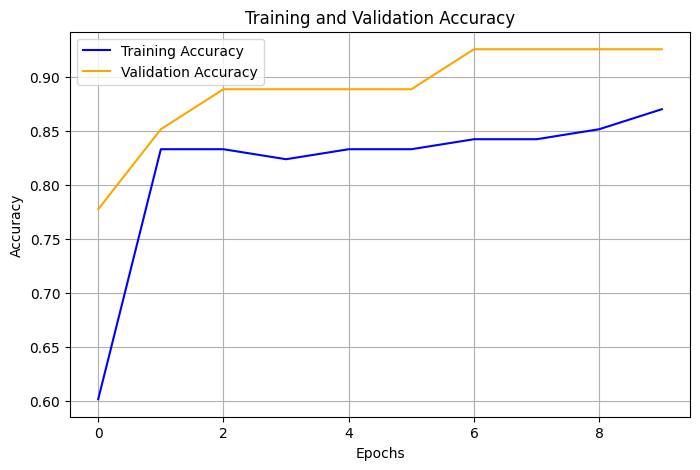


Evaluation on Test Dataset:
------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9333 - loss: 0.2085
Test Loss     : 0.2085
Test Accuracy : 0.9333


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# Hyperparameters
VERBOSE = 1               # Verbosity mode
BATCH_SIZE = 16           # Batch size for training
EPOCHS = 10               # Number of epochs
VALIDATION_SPLIT = 0.2    # 20% of data used for validation

# Print training configuration
print("\nTraining Configuration:")
print("------------------------------------")
print(f"Batch Size       : {BATCH_SIZE}")
print(f"Epochs           : {EPOCHS}")
print(f"Validation Split : {VALIDATION_SPLIT * 100}%")

# Start training the model
print("\nTraining Progress:")
print("------------------------------------")

history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

# Plot training and validation accuracy over epochs
print("\nAccuracy During Training:")
print("------------------------------------")
history_df = pd.DataFrame(history.history)

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_df["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history_df["val_accuracy"], label="Validation Accuracy", color="orange")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test dataset
print("\nEvaluation on Test Dataset:")
print("------------------------------------")
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=VERBOSE)

# Print test evaluation results
print(f"Test Loss     : {test_loss:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f}")

In [4]:
# Saving the model in the Keras native format
model.save("iris_save.keras")

# Loading the model
loaded_model = keras.models.load_model("iris_save.keras")

# Print Model Summary
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,619 (205.55 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,080 (137.04 KB)

In [6]:
import numpy as np

# Raw prediction data
prediction_input = [[6.6, 3.0, 4.4, 1.4]]

# Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

# Get raw prediction probabilities from the loaded model
raw_prediction = loaded_model.predict(scaled_input)
print("Raw Prediction Output (Probabilities):", raw_prediction)

# Find the class with the highest probability
prediction = np.argmax(raw_prediction)
print("Prediction is:", label_encoder.inverse_transform([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Raw Prediction Output (Probabilities): [[0.01863123 0.5413079  0.4400609 ]]
Prediction is: ['versicolor']
